# Load the results

In [5]:
import pandas as pd

In [6]:
datasub_test = pd.read_pickle ('datasub_test_result_Morgan2Feat_Tanimoto.pkl')

In [7]:
datasub_test.head(1)

,Reaction SMILES,reactionID,react_smiles,rxn_smiles,template,Template Verification (True/False),canonical_rxn_smiles,dataset,Reaction Partner (s),Rank,Reaction,Similarity (proposed product vs recorded product),Similarity (recorded reactant vs recorded product)
38,[CH2:2]([c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)...,38,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)N1,c1ccc(C[O:9][c:10]2[c:11]([N:23]3[CH2:24][C:25...,[c:2]-[O;H0;D2;+0:1]-[C;H2;D2;+0]-[c;H0;D3;+0]...,True,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)...,test,[[K]],1,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)...,1.0,0.622222


In [8]:
datasub_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43525 entries, 38 to 447750
Data columns (total 13 columns):
Reaction SMILES                                       43525 non-null object
reactionID                                            43525 non-null int64
react_smiles                                          43525 non-null object
rxn_smiles                                            43525 non-null object
template                                              43525 non-null object
Template Verification (True/False)                    43525 non-null bool
canonical_rxn_smiles                                  43525 non-null object
dataset                                               43525 non-null object
Reaction Partner (s)                                  43525 non-null object
Rank                                                  43525 non-null int64
Reaction                                              43525 non-null object
Similarity (proposed product vs recorded product)     435

# Get Top-K accuracy

In [9]:
# Evaluate
def ranks_to_acc(found_at_rank, fid=None):
    def fprint(txt):
        print(txt)
        if fid is not None:
            fid.write(txt + '\n')
            
    tot = float(len(found_at_rank))
    fprint('{:>8} \t {:>8}'.format('top-n', 'accuracy'))
    accs = []
    for n in [1, 3, 5, 10, 20, 50,9998,9999]:
        accs.append(sum([r <= n for r in found_at_rank]) / tot)
        fprint('{:>8} \t {:>8}'.format(n, accs[-1]))
    return accs

In [10]:
rank_values = datasub_test['Rank'].tolist()

In [11]:
accs = ranks_to_acc(rank_values)

   top-n 	 accuracy
       1 	 0.25617461229178634
       3 	 0.4053072946582424
       5 	 0.48560597357840324
      10 	 0.6084778862722573
      20 	 0.737047673750718
      50 	 0.8628834003446295
    9998 	 0.8953245261344055
    9999 	      1.0


## Sanity check: Top-K accuracy

In [12]:
len (rank_values)

43525

In [13]:
from collections import Counter
Counter (rank_values)

Counter({1: 11150,
         16: 506,
         9999: 4556,
         3: 2547,
         9: 935,
         21: 399,
         37: 162,
         11: 725,
         19: 498,
         41: 123,
         20: 396,
         22: 330,
         29: 205,
         14: 606,
         8: 1001,
         60: 60,
         5: 1633,
         2: 3944,
         4: 1862,
         13: 646,
         54: 56,
         69: 24,
         32: 190,
         7: 1211,
         12: 679,
         18: 480,
         38: 152,
         28: 246,
         6: 1381,
         35: 185,
         79: 8,
         40: 127,
         48: 76,
         23: 291,
         25: 275,
         27: 254,
         15: 590,
         51: 73,
         33: 185,
         57: 61,
         44: 118,
         86: 11,
         10: 820,
         26: 290,
         66: 41,
         34: 204,
         30: 247,
         43: 107,
         17: 470,
         59: 50,
         58: 49,
         45: 91,
         47: 87,
         52: 56,
         46: 96,
         49: 81,
      

# Molecule shifts in distribution towards the product

In [14]:
datasub_test.head(1)

,Reaction SMILES,reactionID,react_smiles,rxn_smiles,template,Template Verification (True/False),canonical_rxn_smiles,dataset,Reaction Partner (s),Rank,Reaction,Similarity (proposed product vs recorded product),Similarity (recorded reactant vs recorded product)
38,[CH2:2]([c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)...,38,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)N1,c1ccc(C[O:9][c:10]2[c:11]([N:23]3[CH2:24][C:25...,[c:2]-[O;H0;D2;+0:1]-[C;H2;D2;+0]-[c;H0;D3;+0]...,True,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)...,test,[[K]],1,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)...,1.0,0.622222


In [17]:
sim_reac = []
sim_prod = []

for item in datasub_test.itertuples():
    
    if item [10] != 9999 and item [10] != 9998:
    
        sim_reac.append (item[13])
        sim_prod.append (item[12])

Text(0, 0.5, 'Number of occurrences')

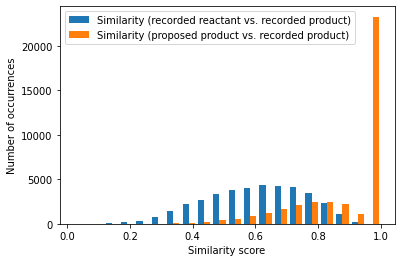

In [18]:
import matplotlib.pyplot as plt
plt.hist([sim_reac, sim_prod], bins = 20)
plt.legend (['Similarity (recorded reactant vs. recorded product)','Similarity (proposed product vs. recorded product)'])
plt.xlabel ('Similarity score')
plt.ylabel ('Number of occurrences')

# Fast filter score plots

In [19]:
datasub_test_ff = pd.read_pickle ('datasub_test_result_Morgan2Feat_Tanimoto_FastFilter.pkl')

In [20]:
datasub_test_ff.head(1)

,Reaction SMILES,reactionID,react_smiles,rxn_smiles,template,Template Verification (True/False),canonical_rxn_smiles,dataset,Reaction Partner (s),Rank,Reaction,Similarity (proposed product vs recorded product),Similarity (recorded reactant vs recorded product),Fast Filter
38,[CH2:2]([c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)...,38,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)N1,c1ccc(C[O:9][c:10]2[c:11]([N:23]3[CH2:24][C:25...,[c:2]-[O;H0;D2;+0:1]-[C;H2;D2;+0]-[c;H0;D3;+0]...,True,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)...,test,[[K]],1,O=C1CN(c2ccc(Oc3ccccc3)cc2OCc2ccccc2)S(=O)(=O)...,1.0,0.622222,0.995744


In [21]:
fast_filter_output = datasub_test_ff ['Fast Filter'].tolist()

In [22]:
fast_filter_output

[0.995743513,
 0.99999696,
 9999.0,
 0.999809,
 0.9234,
 0.800210953,
 9999.0,
 0.98041904,
 9999.0,
 0.995112538,
 0.701509476,
 0.999996364,
 0.999999762,
 0.998667419,
 0.987994194,
 0.0856844187,
 1.0,
 0.994999409,
 9999.0,
 9999.0,
 0.972505689,
 0.997424543,
 0.914359927,
 0.999962449,
 0.999977,
 0.999979377,
 0.990208089,
 0.999223888,
 9999.0,
 9999.0,
 0.586808562,
 0.657338679,
 0.992200613,
 9999.0,
 0.999767303,
 0.999976158,
 0.999998927,
 0.617463946,
 0.0161845088,
 9999.0,
 0.999829769,
 0.972887218,
 0.999849856,
 0.999997675,
 9999.0,
 0.999110341,
 0.735186875,
 0.998694897,
 0.899136901,
 0.999642,
 0.999988794,
 9999.0,
 0.999928296,
 9999.0,
 1.0,
 0.999782562,
 0.911595,
 0.998936355,
 0.990056157,
 0.955812,
 0.999945164,
 0.999568343,
 0.999984384,
 0.998992383,
 0.999994159,
 0.211528927,
 0.919819236,
 0.0122229755,
 0.953597307,
 0.997649908,
 0.9976753,
 9999.0,
 9999.0,
 0.999957681,
 0.995724201,
 9999.0,
 0.990980268,
 0.999960899,
 0.998313069,
 9999.

In [23]:
valueToBeRemoved = [9999, 9998]
result1 = filter(lambda val: val not in  valueToBeRemoved, fast_filter_output) 

In [24]:
fast_filter_output_filtered = list (result1)

In [25]:
fast_filter_output_filtered 

[0.995743513,
 0.99999696,
 0.999809,
 0.9234,
 0.800210953,
 0.98041904,
 0.995112538,
 0.701509476,
 0.999996364,
 0.999999762,
 0.998667419,
 0.987994194,
 0.0856844187,
 1.0,
 0.994999409,
 0.972505689,
 0.997424543,
 0.914359927,
 0.999962449,
 0.999977,
 0.999979377,
 0.990208089,
 0.999223888,
 0.586808562,
 0.657338679,
 0.992200613,
 0.999767303,
 0.999976158,
 0.999998927,
 0.617463946,
 0.0161845088,
 0.999829769,
 0.972887218,
 0.999849856,
 0.999997675,
 0.999110341,
 0.735186875,
 0.998694897,
 0.899136901,
 0.999642,
 0.999988794,
 0.999928296,
 1.0,
 0.999782562,
 0.911595,
 0.998936355,
 0.990056157,
 0.955812,
 0.999945164,
 0.999568343,
 0.999984384,
 0.998992383,
 0.999994159,
 0.211528927,
 0.919819236,
 0.0122229755,
 0.953597307,
 0.997649908,
 0.9976753,
 0.999957681,
 0.995724201,
 0.990980268,
 0.999960899,
 0.998313069,
 0.999976635,
 0.999295592,
 0.831925273,
 0.999778628,
 0.999732375,
 0.999997,
 0.861784935,
 0.999999166,
 0.997150242,
 1.0,
 0.956745327

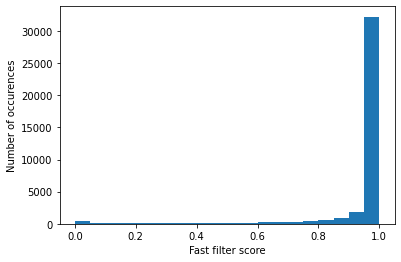

In [26]:
import matplotlib.pyplot as plt
plt.hist (fast_filter_output_filtered, bins = 20)
plt.ylabel ('Number of occurences')
plt.xlabel ('Fast filter score')
plt.savefig ('TestSetFastFilterScores.png')